In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

In [2]:
#Loading Fashion_mnist dataset
(X_train, y_train) , (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

#comments written in this cell have been written from Keras fashion_mnist website

#Label 	Description
#0 	T-shirt/top
#1 	Trouser
#2 	Pullover
#3 	Dress
#4 	Coat
#5 	Sandal
#6 	Shirt
#7 	Sneaker
#8 	Bag
#9 	Ankle boot

#Tuple of NumPy arrays: (x_train, y_train), (x_test, y_test).

#x_train: uint8 NumPy array of grayscale image data with shapes (60000, 28, 28), containing the training data.
#y_train: uint8 NumPy array of labels (integers in range 0-9) with shape (60000,) for the training data.

#x_test: uint8 NumPy array of grayscale image data with shapes (10000, 28, 28), containing the test data.
#y_test: uint8 NumPy array of labels (integers in range 0-9) with shape (10000,) for the test data.



In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train.shape

#this shape of (60000,28,28) represents that X_train has 60,000 elements i.e len(X_train) = 60000
#each element of X_train is in the form of 28x28 matrix

(60000, 28, 28)

In [6]:
X_train[0]

#this is to visualize the first element i.e it is a 28x28 matrix representing the first element

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

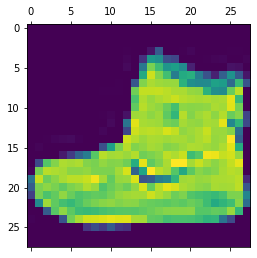

In [7]:
plt.matshow(X_train[0])

#The image is a 28x28 matrix and each value in the above matrix from 0 to 255 represents the shade of a pixel.
#We use pyplot to visualize how this matrix looks like

In [8]:
y_train[0]

#this is basically the required output for this image. 9 represents Ankle boot, which is a match with the above image.

9

In [9]:
# all our matrix values are betwenn 0 and 255. Scaling can help in increasing accuracy.
# We will scale of the values between 0 and 1 by dividing the matrices by 255.

X_train = X_train/255
X_test = X_test/255
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [10]:
# Now we will train the model using keras

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(200,activation = 'relu'),
    keras.layers.Dense(50,activation = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid'),
])

#keras.sequencial because our data is in matrices sequence
#Dense because all 784 inputs are connected with all the 10 outputs i.e for each input, we want prediction value for each output possible and then choose the one with the biggest value.
#First we have to flatten the elements as each element is in the form of 28x28 matrix
#So we pass the input shape as 28,28 and it automatically flattens it into a single array
#Then we use 2 hidden layers, one of 200 outputs and then one of 50 outputs. Then finally, results are classifies in 10 outputs
#Relu and sigmoid are various activation functions already stored in keras

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

#Now we have set the parameters of model in terms of optimizer, loss and metrics.
#adam is the compiler
#sparse categorical crossentropy is the log loss function suitable for integers
#metric is accuracy
#all of them are predefined and can be seen in detail on tensorflow website

model.fit(X_train, y_train, epochs=8)

#epochs is the number of iterations. fit is used to train the model with the above parameters

Epoch 1/8
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4915 - accuracy: 0.8254
Epoch 2/8
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3680 - accuracy: 0.8647
Epoch 3/8
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3301 - accuracy: 0.8779
Epoch 4/8
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3088 - accuracy: 0.8865
Epoch 5/8
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2918 - accuracy: 0.8912
Epoch 6/8
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2741 - accuracy: 0.8972
Epoch 7/8
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2620 - accuracy: 0.9021
Epoch 8/8
1875/1875 [==============================] - 2s 971us/step - loss: 0.2528 - accuracy: 0.9050


# Parameters
I have tried using multiple hidden layes but using 2 hidden layers gives the best accuracy. Accuracy remained similar on changing output values so 200 and 50 have been chosen.<br />
Using optimizers 'adam' , 'rmsprop' and 'nadam' give similar accuracy of 90%. However using 'ftrl' gives us least accuracy of 10% in our model.<br />
Using log loss or sparse categorical crossentropy gives us accuracy of 90% but mean squared error reduces accuracy to 8%.<br />
Relu and sigmoid functions are best activation functions. Other activation functions such as 'tanh' gave low accuracy.<br />
Epochs has been chosen as 8 because it was seen that accuracy starts repeating itself after 5-6 iterations.

In [11]:
model.evaluate(X_test, y_test)

#we have trained the model above. Now we use the same model to evaluate how it performs on the test dataset.
#We get an accuracy of  anf loss of 

313/313 [==============================] - 0s 713us/step - loss: 0.3257 - accuracy: 0.8834


[0.3257087469100952, 0.883400022983551]

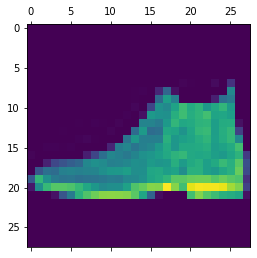

In [12]:
plt.matshow(X_test[0])

In [13]:
y_predicted = model.predict(X_test)
y_predicted[0]

#y_predicted is an array with all the predictions of each element. 
#We had a dense Neural Network, so we get all 10 output predictions for each input element.

array([7.0905685e-04, 1.6605503e-05, 1.6125041e-05, 9.1757101e-05,
       9.9646044e-05, 6.6913277e-02, 1.9926376e-05, 9.5527327e-01,
       5.3134561e-04, 9.9904835e-01], dtype=float32)

In [14]:
np.argmax(y_predicted[0])

#We need to choose the value from 0 to 9 with highest output prpediction.
#We can see above that 9 has highest output with 9.366e-1.
#argmax simply return the argument with max output prediction, which is 9 in the case of y_predicted[0]

9

In [15]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[0:10]

#We now form the array with only argmax values as all other predictions are useless
#I have printed the first 10 predictions

[9, 2, 1, 1, 6, 1, 4, 6, 5, 7]

In [16]:
y_test[:10]
#The first 10 predictions match with the first 10 truth values

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

In [17]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm

#cm is confusion matrix. The rows represent the truth values and columns represent the predicted values.
#we will represent this is graphical form for better understanding

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[812,   1,  17,  58,   0,   0,  95,   0,  17,   0],
       [  0, 970,   0,  24,   2,   0,   3,   0,   1,   0],
       [ 18,   1, 812,  18,  83,   0,  64,   0,   4,   0],
       [ 14,   4,   8, 921,  28,   0,  21,   0,   4,   0],
       [  0,   1,  95,  40, 794,   0,  61,   0,   9,   0],
       [  0,   0,   0,   0,   0, 956,   0,  27,   2,  15],
       [111,   0,  88,  44,  70,   0, 674,   0,  13,   0],
       [  0,   0,   0,   0,   0,  14,   0, 971,   1,  14],
       [  3,   0,   3,   5,   2,   1,   2,   2, 982,   0],
       [  0,   0,   0,   0,   0,   6,   1,  51,   0, 942]])>

Text(69.0, 0.5, 'Truth')

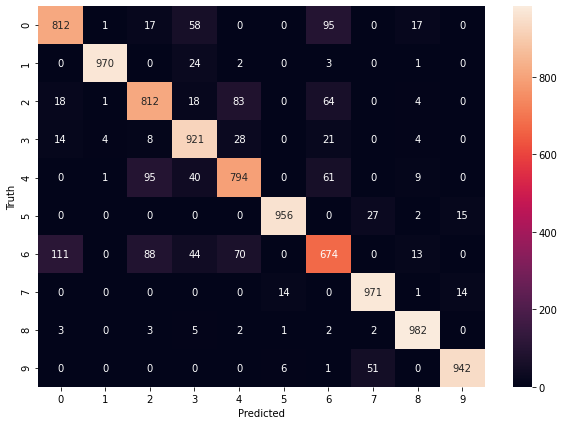

In [18]:
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#We have drawn a heatmap using the confusion matrix.
#The rows represent the truth values and columns represent the predicted values.
#All the diagnol values represent the correct predictions.


# Result

We have made an Image Classification model using MNIST Fashion dataset with keras and temsorflow which gives us an accuracy of around 90% and log loss of 0.25 on the train dataframe.<br />
On the test dataframe, we get an accuracy of around 88% with log loss of 0.32<br />
Using seaborn, we have visualised the result of test dataframe.